## Radiocarbon age models and linear regressions

In [4]:
# Load packages
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
pd.set_option('max_rows', 6)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import cmocean.cm as cmo
import csv
import statsmodels.api as sm
from scipy import stats

# mpl.rcParams['mathtext.fontset'] = 'cm'
# mpl.rcParams['mathtext.rm'] = 'serif'

In [14]:
# Import the radicoarbon data
df = pd.read_csv('~/Documents/GitHub/data/schiff radiocarbon 06-10-2020.csv')
stetson = df[df['Coral'] == 'stet-4904-bc1-d5']
jack4684 = df[df['Coral'] == 'jack-4684-bc1']
stetson_old = df[df['Coral'] == 'stet-4904-bc1']
sav = df[df['Coral'] == 'sav-4902-bc1']
jack4907 = df[df['Coral'] == 'jack-4907-bc1-d1']
jack4686 = df[df['Coral'] == 'jack-4686-bc1-t1']

df

,Coral,ID 1,ID 2,Sample,Distance microns,Fraction modern,error,D14C,D14C.1,d13C,14C Age,error.1,Year analyzed
0,jack-4907-bc1-d1,NaN,Jacksonville Deep Water Coral 1105LEJK4907_17,2,95,0.8800,0.0041,-118.7,-124.6,-14.8,1010.0,35.0,2006
1,jack-4907-bc1-d1,NaN,Jacksonville Deep Water Coral 1105LEJK4907_18,7,236,0.8600,0.0032,-138.1,-143.9,-15.2,1190.0,30.0,2006
2,jack-4907-bc1-d1,NaN,Jacksonville Deep Water Coral 1105LEJK4907_1,11,512,0.8000,0.0028,-203.5,-208.9,-15.0,1830.0,30.0,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,jack-4686-bc1-t1,NaN,NaN,"83,84,85",4080,0.9085,0.0019,-91.5,NaN,NaN,770.0,15.0,2020
96,jack-4686-bc1-t1,NaN,NaN,"106,107,108",5184,0.8862,0.0018,-113.8,NaN,NaN,970.0,15.0,2020
97,jack-4686-bc1-t1,NaN,NaN,"123,124,125",6000,0.8698,0.0017,-130.2,NaN,NaN,1120.0,15.0,2020


### Bomb spike figures.

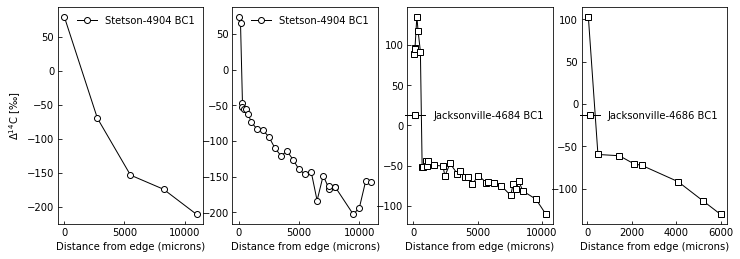

In [3]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (12,4))
ax1.plot('Distance microns', 'D14C', data=stetson_old, label = "Stetson-4904 BC1",marker = "o", color = 'k', markerfacecolor = "white", linewidth = 1)
ax2.plot('Distance microns', 'D14C', data=stetson, label = "Stetson-4904 BC1",marker = "o", color = 'k', markerfacecolor = "white", linewidth = 1)
ax3.plot('Distance microns', 'D14C', data=jack4684, label = "Jacksonville-4684 BC1", marker = "s", color = 'k', markerfacecolor = "white", linewidth = 1)
ax4.plot('Distance microns', 'D14C', data=jack4686, label = "Jacksonville-4686 BC1", marker = "s", color = 'k', markerfacecolor = "white", linewidth = 1)

ax1.set_ylabel(r'$\mathrm{\Delta}^{14}$C ['u"\u2030]")
ax1.set_xlabel('Distance from edge (microns)')
ax2.set_xlabel('Distance from edge (microns)')
ax3.set_xlabel('Distance from edge (microns)')
ax4.set_xlabel('Distance from edge (microns)')

ax1.tick_params(direction='in')
ax2.tick_params(direction='in')
ax3.tick_params(direction='in')
ax4.tick_params(direction='in')

ax1.legend(frameon=False, loc = 0)
ax2.legend(frameon=False, loc = 0)
ax3.legend(frameon=False, loc = 0)
ax4.legend(frameon=False, loc = 0)

plt.savefig('fig_d14c_results_recent.png', dpi = 300, bbox_inches = 'tight')

In [5]:
df.Coral.unique()

array(['jack-4907-bc1-d1', 'stet-4904-bc1', 'sav-4902-bc1',
       'jack-4684-bc1', 'stet-4904-bc1-d5'], dtype=object)

### Ancient D14C figures

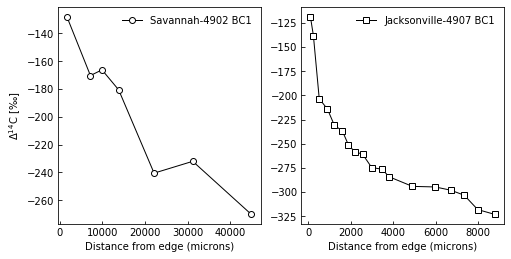

In [36]:
mpl.rc('font',family='Helvetica')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,4))
ax1.plot('Distance microns', 'D14C', data=sav, label = "Savannah-4902 BC1",marker = "o", color = 'k', markerfacecolor = "white", linewidth = 1)
ax2.plot('Distance microns', 'D14C', data=jack4907, label = "Jacksonville-4907 BC1",marker = "s", color = 'k', markerfacecolor = "white", linewidth = 1)

ax1.set_ylabel(r'$\mathrm{\Delta}^{14}$C ['u"\u2030]")
ax1.set_xlabel('Distance from edge (microns)')
ax2.set_xlabel('Distance from edge (microns)')

ax1.tick_params(direction='in')
ax2.tick_params(direction='in')

ax1.legend(frameon=False, loc = 0)
ax2.legend(frameon=False, loc = 0)

plt.savefig('fig_d14c_results_ancient.png', dpi = 300, bbox_inches = 'tight')

In [29]:
stetson = stetson.dropna(subset=['14C Age'])

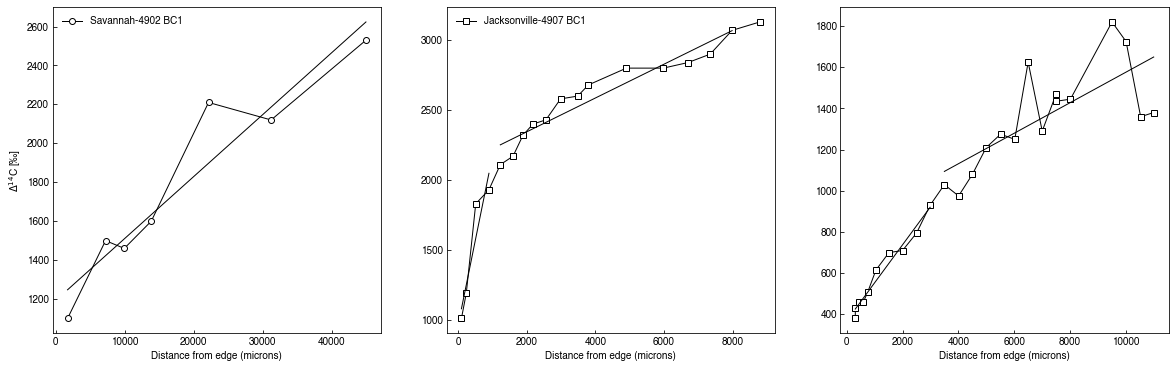

In [39]:
mpl.rc('font',family='Helvetica')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,6))

ax1.plot('Distance microns', '14C Age', data=sav, label = "Savannah-4902 BC1",marker = "o", color = 'k', markerfacecolor = "white", linewidth = 1)
ax2.plot('Distance microns', '14C Age', data=jack4907, label = "Jacksonville-4907 BC1",marker = "s", color = 'k', markerfacecolor = "white", linewidth = 1)
ax3.plot('Distance microns', '14C Age', data=stetson, label = "Jacksonville-4907 BC1",marker = "s", color = 'k', markerfacecolor = "white", linewidth = 1)


ax1.set_ylabel(r'$\mathrm{\Delta}^{14}$C ['u"\u2030]")
ax1.set_xlabel('Distance from edge (microns)')
x = sav['Distance microns']
y = sav['14C Age']
(m, b) = np.polyfit(x, y, 1)
yp = np.polyval([m, b], x)
ax1.plot(x, yp, color = 'black', linewidth = 1)

ax2.set_xlabel('Distance from edge (microns)')
x = jack4907['Distance microns'][0:4]
y = jack4907['14C Age'][0:4]
(m, b) = np.polyfit(x, y, 1)
yp = np.polyval([m, b], x)
ax2.plot(x, yp, color = 'black', linewidth = 1)

x = jack4907['Distance microns'][4:17]
y = jack4907['14C Age'][4:17]
(m, b) = np.polyfit(x, y, 1)
yp = np.polyval([m, b], x)
ax2.plot(x, yp, color = 'black', linewidth = 1)

ax3.set_xlabel('Distance from edge (microns)')
x = stetson['Distance microns'][0:10]
y = stetson['14C Age'][0:10]
(m, b) = np.polyfit(x, y, 1)
yp = np.polyval([m, b], x)
ax3.plot(x, yp, color = 'black', linewidth = 1)

x = stetson['Distance microns'][10:27]
y = stetson['14C Age'][10:27]
(m, b) = np.polyfit(x, y, 1)
yp = np.polyval([m, b], x)
ax3.plot(x, yp, color = 'black', linewidth = 1)

ax1.tick_params(direction='in')
ax2.tick_params(direction='in')
ax3.tick_params(direction='in')

ax1.legend(frameon=False, loc = 0)
ax2.legend(frameon=False, loc = 0)

plt.savefig('fig_d14c_results_multiple_regressions.png', dpi = 300, bbox_inches = 'tight')

In [8]:
jack4907.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 13 columns):
Coral               18 non-null object
ID 1                0 non-null object
ID 2                18 non-null object
Sample              18 non-null object
Distance microns    18 non-null int64
Fraction modern     18 non-null float64
error               18 non-null float64
D14C                18 non-null float64
D14C.1              18 non-null float64
d13C                18 non-null float64
14C Age             18 non-null object
error.1             18 non-null float64
Year analyzed       18 non-null int64
dtypes: float64(6), int64(2), object(5)
memory usage: 2.0+ KB
